In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# All the datasets 

box_office_mojo = pd.read_csv("./data/bom.movie_gross.csv")

imdb_name = pd.read_csv("./data/name.basics.csv")
imdb_title = pd.read_csv("./data/title.basics.csv")
imdb_crew = pd.read_csv("./data/title.crew.csv") 
imdb_principals = pd.read_csv("./data/title.principals.csv")
imdb_ratings = pd.read_csv("./data/title.ratings.csv")
imdb_akas = pd.read_csv("./data/title.akas.csv")

rt_info = pd.read_csv("./data/rt.movie_info.tsv", sep = "\t")
rt_reviews = pd.read_csv("./data/rt.reviews.tsv", sep = "\t", encoding='windows-1252')

the_movie_db = pd.read_csv("./data/tmdb.movies.csv")

movie_budgets = pd.read_csv("./data/tn.movie_budgets.csv")

In [3]:
title_and_ratings = imdb_title.merge(imdb_ratings, on="tconst")

In [4]:
title_and_ratings = title_and_ratings.rename(columns={"primary_title":"movie"})

In [5]:
imdb_crew = imdb_crew.rename(columns={"directors":"nconst"})

In [6]:
names_of_director = imdb_crew.merge(imdb_name, on="nconst")

In [7]:
imdb_df = title_and_ratings.merge(names_of_director, on="tconst")

In [8]:
df = imdb_df.merge(movie_budgets, on="movie")

In [9]:
df = df.drop([#'tconst', 
         'original_title', 
         'start_year', 
         'nconst', 
         'writers', 
         'birth_year', 
         'death_year', 
         'primary_profession', 
         'known_for_titles', 
         'id'], axis=1)

In [10]:
df.head()

,tconst,movie,runtime_minutes,genres,averagerating,numvotes,primary_name,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,Lawrence Kasanoff,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,88.0,NaN,7.5,24,Jed I. Goodman,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,79.0,"Comedy,Mystery",6.1,14828,Patrick Brice,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,Walter Salles,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,89.0,Drama,6.0,6,Poong-ki Kim,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"


### Clean up columns
1. movie: find duplicates, but check if totally the same, or other features are different
2. runtime_minutes:
3. genres: list multiple genres (in analysis, include combination of genres as separate category)
4. averagerating: rename with underscore
5. numvotes: rename with underscore
6. primary_name:
7. release_data: change format to datetime
8. production_budget: change to int
9. domestic_gross: change to int
10. worldwide_gross: change to int

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
def dollar_to_int(column):
    return column.str.replace('$', '').str.replace(',', '').map(int)

In [12]:
df[['production_budget', 'domestic_gross', 'worldwide_gross']] = df[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(dollar_to_int)

In [13]:
df.head()

,tconst,movie,runtime_minutes,genres,averagerating,numvotes,primary_name,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,Lawrence Kasanoff,2012-12-31,45000000,0,73706
1,tt0326592,The Overnight,88.0,NaN,7.5,24,Jed I. Goodman,2015-06-19,200000,1109808,1165996
2,tt3844362,The Overnight,79.0,"Comedy,Mystery",6.1,14828,Patrick Brice,2015-06-19,200000,1109808,1165996
3,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,Walter Salles,2013-03-22,25000000,720828,9313302
4,tt4339118,On the Road,89.0,Drama,6.0,6,Poong-ki Kim,2013-03-22,25000000,720828,9313302


### Remove missing values of worldwide_gross

In [14]:
df = df[~(df['worldwide_gross']==0)]

### Create new columns
11. total_profit
12. profit_budget_ratio
13. day
14. month
15. year

In [15]:
df['total_profit'] = df['worldwide_gross'] - df['production_budget']

In [16]:
df['profit_to_budget'] = (df['worldwide_gross'] / df['production_budget'])*100

In [17]:
df['day'] = df['release_date'].dt.day_name()

In [18]:
df['month'] = pd.DatetimeIndex(df['release_date']).month

In [19]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [20]:
df.head()

,tconst,movie,runtime_minutes,genres,averagerating,numvotes,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,total_profit,profit_to_budget,day,month,year
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,Lawrence Kasanoff,2012-12-31,45000000,0,73706,-44926294,0.163791,Monday,12,2012
1,tt0326592,The Overnight,88.0,NaN,7.5,24,Jed I. Goodman,2015-06-19,200000,1109808,1165996,965996,582.998000,Friday,6,2015
2,tt3844362,The Overnight,79.0,"Comedy,Mystery",6.1,14828,Patrick Brice,2015-06-19,200000,1109808,1165996,965996,582.998000,Friday,6,2015
3,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,Walter Salles,2013-03-22,25000000,720828,9313302,-15686698,37.253208,Friday,3,2013
4,tt4339118,On the Road,89.0,Drama,6.0,6,Poong-ki Kim,2013-03-22,25000000,720828,9313302,-15686698,37.253208,Friday,3,2013


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             2360 non-null   object        
 1   movie              2360 non-null   object        
 2   runtime_minutes    2267 non-null   float64       
 3   genres             2354 non-null   object        
 4   averagerating      2360 non-null   float64       
 5   numvotes           2360 non-null   int64         
 6   primary_name       2360 non-null   object        
 7   release_date       2360 non-null   datetime64[ns]
 8   production_budget  2360 non-null   int64         
 9   domestic_gross     2360 non-null   int64         
 10  worldwide_gross    2360 non-null   int64         
 11  total_profit       2360 non-null   int64         
 12  profit_to_budget   2360 non-null   float64       
 13  day                2360 non-null   object        
 14  month   

In [22]:
df.describe()

,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,total_profit,profit_to_budget,month,year
count,2267.000000,2360.000000,2.360000e+03,2.360000e+03,2.360000e+03,2.360000e+03,2.360000e+03,2360.000000,2360.000000,2360.000000
mean,104.801500,6.312966,7.320035e+04,3.669066e+07,4.509926e+07,1.068190e+08,7.012833e+07,444.236626,6.881780,2010.019068
std,20.775804,1.124912,1.405273e+05,4.808589e+07,7.190164e+07,1.951276e+08,1.610092e+08,1435.526266,3.475343,9.372607
min,5.000000,1.600000,5.000000e+00,9.000000e+03,0.000000e+00,2.600000e+01,-2.002376e+08,0.002600,1.000000,1915.000000
25%,92.000000,5.700000,2.100000e+02,7.000000e+06,2.058697e+06,6.328516e+06,-2.168533e+06,59.223248,4.000000,2010.000000
50%,103.000000,6.400000,1.476500e+04,2.000000e+07,2.122036e+07,3.826860e+07,1.424287e+07,180.567206,7.000000,2013.000000
75%,116.000000,7.100000,8.564725e+04,4.500000e+07,5.517640e+07,1.104207e+08,7.107578e+07,388.014122,10.000000,2015.000000
max,280.000000,9.300000,1.841066e+06,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09,31235.431235,12.000000,2019.000000


### Analysis of release_date: day, month, year

In [32]:
df['day'].value_counts(normalize=True)*100

Friday       85.042373
Wednesday     8.898305
Tuesday       2.966102
Thursday      1.737288
Sunday        0.635593
Monday        0.423729
Saturday      0.296610
Name: day, dtype: float64

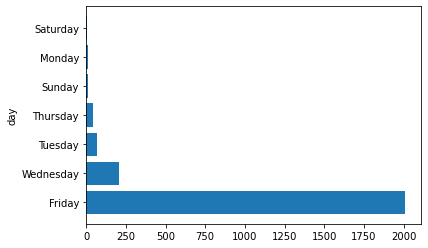

In [39]:
fig, ax = plt.subplots()

day_values = df['day'].value_counts()

ax.barh(
    y=day_values.index,
    width=day_values.values
)
ax.set_ylabel('day');

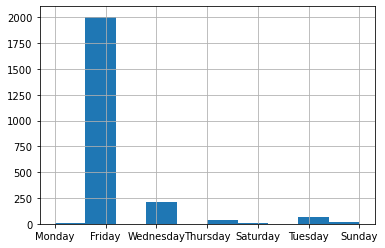

In [27]:
df['day'].hist();

In [37]:
df['month'].value_counts(normalize=True)*100

12    11.144068
10     9.703390
4      9.067797
11     8.644068
8      8.644068
9      8.516949
3      8.389831
6      7.881356
7      7.415254
5      7.076271
2      6.991525
1      6.525424
Name: month, dtype: float64

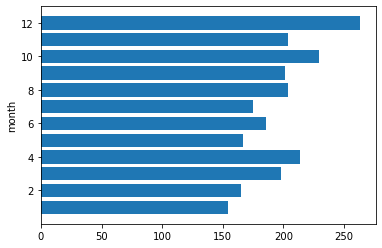

In [40]:
fig, ax = plt.subplots()

month_values = df['month'].value_counts()

ax.barh(
    y=month_values.index,
    width=month_values.values
)
ax.set_ylabel('month');

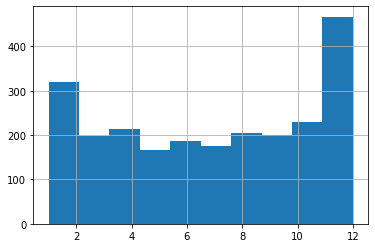

In [41]:
df['month'].hist();

In [42]:
df['year'].value_counts(normalize=True)*100

2015    10.932203
2011     9.618644
2013     8.771186
2014     8.728814
2016     7.923729
2010     7.584746
2012     7.245763
2017     7.118644
2018     5.932203
2009     2.118644
2000     2.033898
2001     1.694915
2002     1.652542
2019     1.610169
2008     1.525424
1999     1.525424
2003     1.440678
2005     1.271186
1996     1.144068
2004     0.974576
1998     0.847458
2006     0.847458
1997     0.847458
2007     0.805085
1995     0.593220
1994     0.593220
1992     0.508475
1993     0.423729
1986     0.296610
1981     0.296610
1990     0.254237
1980     0.254237
1983     0.211864
1984     0.169492
1982     0.169492
1978     0.169492
1991     0.169492
1940     0.169492
1976     0.127119
1988     0.127119
1985     0.127119
1944     0.084746
1960     0.084746
1966     0.084746
1968     0.084746
1972     0.084746
1989     0.084746
1987     0.084746
1979     0.084746
1974     0.084746
1915     0.042373
1973     0.042373
1965     0.042373
1959     0.042373
1956     0.042373
1950     0

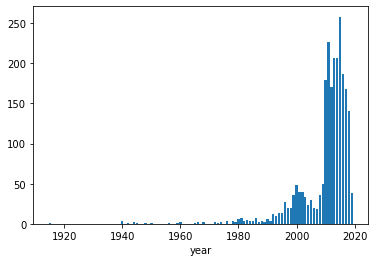

In [49]:
fig, ax = plt.subplots()

year_values = df['year'].value_counts()

ax.bar(
    x=year_values.index,
    height=year_values.values
)
ax.set_xlabel('year');

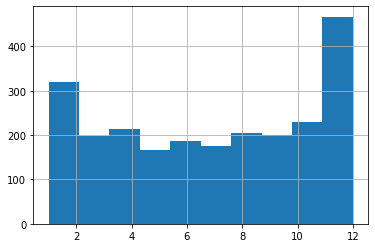

In [45]:
df['month'].hist();

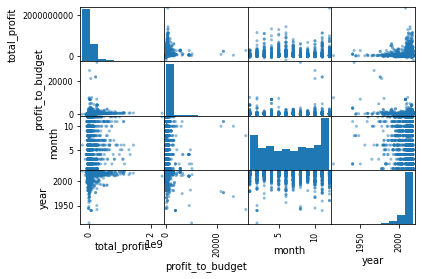

In [100]:
pd.plotting.scatter_matrix(df[['total_profit', 'profit_to_budget', 'month', 'year']]);

### Relationship between release_date and total_profit

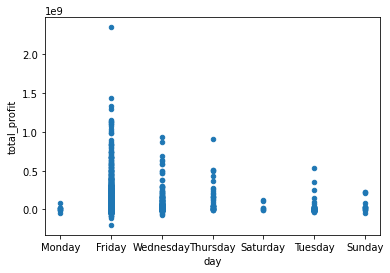

In [92]:
df.plot('day', 'total_profit', kind='scatter');

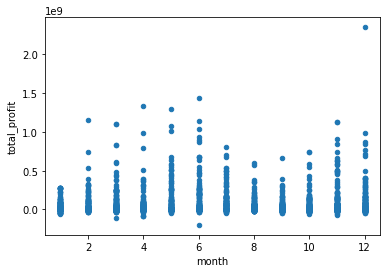

In [93]:
df.plot('month', 'total_profit', kind='scatter');

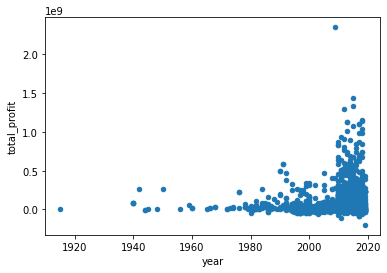

In [94]:
df.plot('year', 'total_profit', kind='scatter');

### Relationship between release_date and profit_to_budget

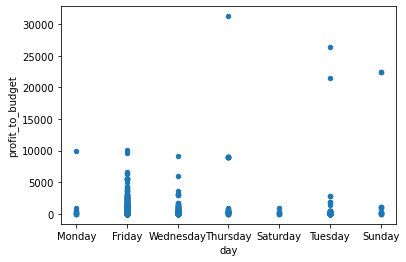

In [89]:
df.plot('day', 'profit_to_budget', kind='scatter');

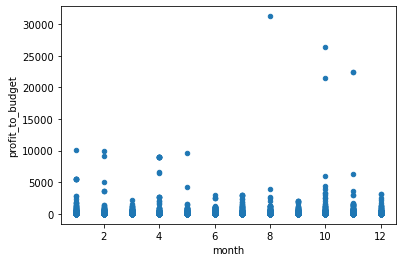

In [90]:
df.plot('month', 'profit_to_budget', kind='scatter');

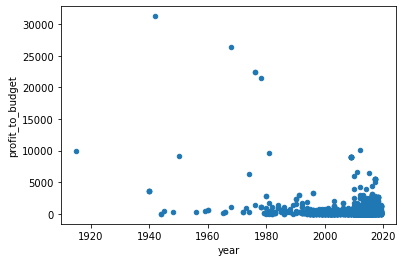

In [91]:
df.plot('year', 'profit_to_budget', kind='scatter');

#### Correlation between profit_to_budget and columns

In [69]:
df.dtypes

tconst                       object
movie                        object
runtime_minutes             float64
genres                       object
averagerating               float64
numvotes                      int64
primary_name                 object
release_date         datetime64[ns]
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
total_profit                  int64
profit_to_budget            float64
day                          object
month                         int64
year                          int64
dtype: object

In [75]:
corr_dict = {}
for col in df.columns:
    if col == 'profit_to_budget' or col == 'release_date':
        continue
    if df[col].dtype != 'object':
        col_corr = df['profit_to_budget'].corr(df[col], method='pearson')
        #np.corrcoef(df['profit_to_budget'], df[col])[0][1]
        corr_dict[col] = col_corr
        
max_corr = max(corr_dict, key=corr_dict.get)

In [76]:
max_corr 

'total_profit'

In [78]:
min_corr = min(corr_dict, key=corr_dict.get)
min_corr

'year'

In [79]:
corr_dict

{'runtime_minutes': -0.03731881708112421,
 'averagerating': 0.014394151204856202,
 'numvotes': 0.03403386106693984,
 'production_budget': -0.08141290607201596,
 'domestic_gross': 0.11705979629244848,
 'worldwide_gross': 0.09455529240085765,
 'total_profit': 0.13890615167447598,
 'month': -0.0172771930423375,
 'year': -0.25524928807289443}